In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering

from sklearn.svm import SVC

## Loading Data sets

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


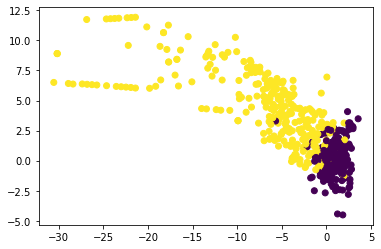

In [71]:
# Dataset 1 from Homework 1: credit cards
credit = pd.read_csv("creditcard.csv")
fraud_df = credit.loc[credit['Class'] == 1]
non_fraud_df = credit.loc[credit['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

DATASET1 = new_df.dropna()
DATASET1 = DATASET1[['V1','V2','V3','V4','V5','V6','Class']]
X_train1, X_test1= train_test_split(DATASET1, test_size=0.4,random_state=41)
train_label1=X_train1['Class']
test_label1=X_test1['Class']
X_train1.drop(['Class'], axis=1,inplace=True)
X_test1.drop(['Class'], axis=1,inplace=True)
color1 = (0.69411766529083252, 0.3490196168422699, 
          0.15686275064945221, 1.0)
color2 = (0.65098041296005249, 0.80784314870834351,
          0.89019608497619629, 1.0)

plt.scatter(X_train1['V3'], X_train1['V4'],c=train_label1)

In [82]:
# Dataset 2 from Homework 1: Data Science Salaries
salaries = pd.read_csv("salaries.csv")
#salaries = pd.get_dummies(salaries, columns=['job_title', 'job_category', 'experience_level', 'work_setting','employment_type','company_location','company_size','salary_currency', 'salary', 'employee_residence'])
salaries['job_title'] = salaries['job_title'].str.replace('Business Intelligence','BI')
salaries['job_title'] = salaries['job_title'].str.replace('Machine Learning','ML')
salaries.drop(['salary_currency','salary'], axis = 1, inplace = True)

set1 = sorted(set(salaries['job_title']))
dictionary = {key: index for index, key in enumerate(set1)}
salaries['job_title'] = salaries['job_title'].replace(dictionary)

set1 = sorted(set(salaries["job_category"]))
dictionary = {key: index for index, key in enumerate(set1)}
salaries['job_category'] = salaries['job_category'].replace(dictionary)

set1 = sorted(set(salaries["employee_residence"]))
dictionary = {key: index for index, key in enumerate(set1)}
salaries['employee_residence'] = salaries['employee_residence'].replace(dictionary)

set1 = sorted(set(salaries["experience_level"]))
dictionary = {key: index for index, key in enumerate(set1)}
salaries['experience_level'] = salaries['experience_level'].replace(dictionary)

set1 = sorted(set(salaries["employee_residence"]))
dictionary = {key: index for index, key in enumerate(set1)}
salaries['employee_residence'] = salaries['employee_residence'].replace(dictionary)

set1 = sorted(set(salaries["employment_type"]))
dictionary = {key: index for index, key in enumerate(set1)}
salaries['employment_type'] = salaries['employment_type'].replace(dictionary)

set1 = sorted(set(salaries["work_setting"]))
dictionary = {key: index for index, key in enumerate(set1)}
salaries['work_setting'] = salaries['work_setting'].replace(dictionary)

set1 = sorted(set(salaries["company_location"]))
dictionary = {key: index for index, key in enumerate(set1)}
salaries['company_location'] = salaries['company_location'].replace(dictionary)

set1 = sorted(set(salaries["company_size"]))
dictionary = {key: index for index, key in enumerate(set1)}
salaries['company_size'] = salaries['company_size'].replace(dictionary)


DATASET2 = salaries.dropna()

DATASET2['salary_in_usd'] = DATASET2['salary_in_usd']>100000
DATASET2['salary_in_usd'] = DATASET2['salary_in_usd'].astype(int)

X_train2, X_test2= train_test_split(DATASET2, test_size=0.4,random_state=41)
train_label2=X_train2['salary_in_usd']
test_label2=X_test2['salary_in_usd']

X_train2.drop(['salary_in_usd'], axis=1,inplace=True)
X_test2.drop(['salary_in_usd'], axis=1,inplace=True)
DATASET2

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,work_year,job_title,job_category,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,39,4,0,29,2,2,0,23,0
1,2023,38,3,1,80,3,2,1,69,1
2,2023,38,3,0,80,3,2,1,69,1
3,2023,66,7,1,80,3,2,1,69,1
4,2023,66,7,0,80,3,2,1,69,1
...,...,...,...,...,...,...,...,...,...,...
9350,2021,68,5,1,80,3,2,2,69,0
9351,2020,66,7,1,80,3,2,2,69,0
9352,2021,110,7,1,80,2,2,2,69,0
9353,2020,66,7,1,80,0,2,2,69,2


## Clustering Algorithm 1: Expectation Maximization


### Data 1

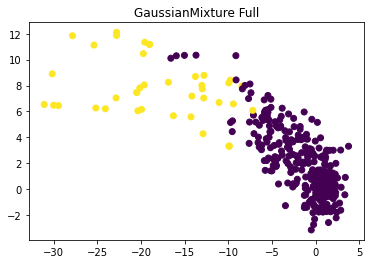

Full Covariance: 
  Training Accuracy:  0.6203389830508474
  Test Accuracy:  0.6065989847715736


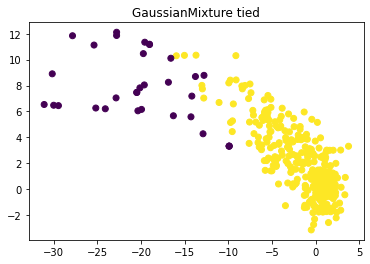

Tied Covariance: 
  Training Accuracy:  0.4152542372881356
  Test Accuracy:  0.4137055837563452


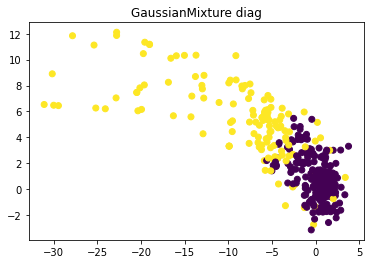

Diag Covariance: 
  Training Accuracy:  0.8406779661016949
  Test Accuracy:  0.7868020304568528


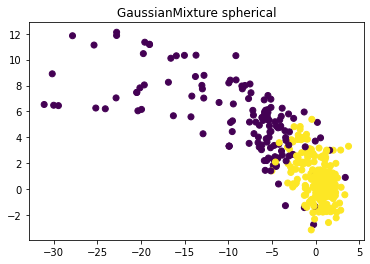

spherical Covariance: 
  Training Accuracy:  0.1576271186440678
  Test Accuracy:  0.19289340101522842


In [81]:
gm = GaussianMixture(n_components=2,covariance_type = 'full').fit(X_train1)
train_predict1 = gm.predict(X_train1)
train_acc1 = metrics.accuracy_score(train_label1,train_predict1)


test_predict1 = gm.predict(X_test1)
test_acc1 = metrics.accuracy_score(test_label1,test_predict1)

plt.scatter(X_test1['V3'], X_test1['V4'],c=test_predict1)
plt.title("GaussianMixture Full")
plt.show()
print("Full Covariance: ")
print("  Training Accuracy: ", train_acc1)
print("  Test Accuracy: ", test_acc1)

gm = GaussianMixture(n_components=2,covariance_type = 'tied').fit(X_train1)
train_predict1 = gm.predict(X_train1)
train_acc1 = metrics.accuracy_score(train_label1,train_predict1)


test_predict1 = gm.predict(X_test1)
test_acc1 = metrics.accuracy_score(test_label1,test_predict1)
plt.scatter(X_test1['V3'], X_test1['V4'],c=test_predict1)
plt.title("GaussianMixture tied")
plt.show()
print("Tied Covariance: ")
print("  Training Accuracy: ", train_acc1)
print("  Test Accuracy: ", test_acc1)

gm = GaussianMixture(n_components=2,covariance_type = 'diag').fit(X_train1)
train_predict1 = gm.predict(X_train1)
train_acc1 = metrics.accuracy_score(train_label1,train_predict1)


test_predict1 = gm.predict(X_test1)
test_acc1 = metrics.accuracy_score(test_label1,test_predict1)
plt.scatter(X_test1['V3'], X_test1['V4'],c=test_predict1)
plt.title("GaussianMixture diag")
plt.show()
print("Diag Covariance: ")
print("  Training Accuracy: ", train_acc1)
print("  Test Accuracy: ", test_acc1)

gm = GaussianMixture(n_components=2,covariance_type = 'spherical').fit(X_train1)
train_predict1 = gm.predict(X_train1)
train_acc1 = metrics.accuracy_score(train_label1,train_predict1)
test_predict1 = gm.predict(X_test1)
test_acc1 = metrics.accuracy_score(test_label1,test_predict1)
plt.scatter(X_test1['V3'], X_test1['V4'],c=test_predict1)
plt.title("GaussianMixture spherical")
plt.show()
print("spherical Covariance: ")
print("  Training Accuracy: ", train_acc1)
print("  Test Accuracy: ", test_acc1)


### Data 2

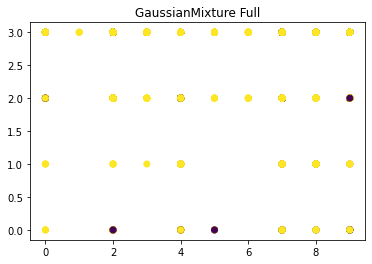

Full Covariance: 
   Training Accuracy:  0.8088366292535186
   Test Accuracy:  0.7942276857295564


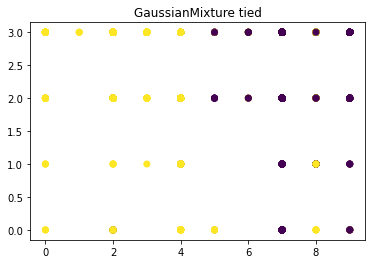

Tied Covariance: 
   Training Accuracy:  0.46107251024407625
   Test Accuracy:  0.45430251202565475


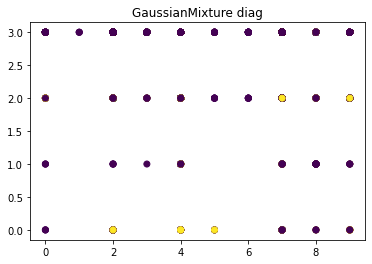

Diag Covariance: 
   Training Accuracy:  0.18617495100659184
   Test Accuracy:  0.19214323890967397


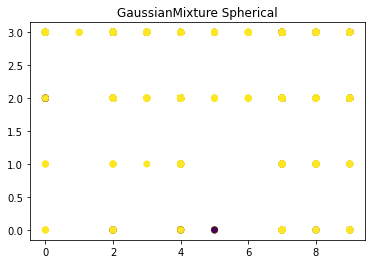

Spherical Covariance: 
   Training Accuracy:  0.7928024229467308
   Test Accuracy:  0.7733832175307322


In [88]:
gm2 = GaussianMixture(n_components = 2,covariance_type = 'full').fit(X_train2)
train_predict2 = gm2.predict(X_train2)
train_acc2 = metrics.accuracy_score(train_label2,train_predict2)
test_predict2 = gm2.predict(X_test2)
test_acc2 = metrics.accuracy_score(test_label2,test_predict2)
plt.scatter(X_test2["job_category"],X_test2["experience_level"],c=test_predict2)
plt.title("GaussianMixture Full")
plt.show()
print("Full Covariance: ")
print("   Training Accuracy: ", train_acc2)
print("   Test Accuracy: ", test_acc2)

gm2 = GaussianMixture(n_components = 2,covariance_type = 'tied').fit(X_train2)
train_predict2 = gm2.predict(X_train2)
train_acc2 = metrics.accuracy_score(train_label2,train_predict2)
test_predict2 = gm2.predict(X_test2)
test_acc2 = metrics.accuracy_score(test_label2,test_predict2)
plt.scatter(X_test2["job_category"],X_test2["experience_level"],c=test_predict2)
plt.title("GaussianMixture tied")
plt.show()
print("Tied Covariance: ")
print("   Training Accuracy: ", train_acc2)
print("   Test Accuracy: ", test_acc2)

gm2 = GaussianMixture(n_components = 2,covariance_type = 'diag').fit(X_train2)
train_predict2 = gm2.predict(X_train2)
train_acc2 = metrics.accuracy_score(train_label2,train_predict2)
test_predict2 = gm2.predict(X_test2)
test_acc2 = metrics.accuracy_score(test_label2,test_predict2)
plt.scatter(X_test2["job_category"],X_test2["experience_level"],c=test_predict2)
plt.title("GaussianMixture diag")
plt.show()
print("Diag Covariance: ")
print("   Training Accuracy: ", train_acc2)
print("   Test Accuracy: ", test_acc2)

gm2 = GaussianMixture(n_components = 2,covariance_type = 'spherical').fit(X_train2)
train_predict2 = gm2.predict(X_train2)
train_acc2 = metrics.accuracy_score(train_label2,train_predict2)
test_predict2 = gm2.predict(X_test2)
test_acc2 = metrics.accuracy_score(test_label2,test_predict2)
plt.scatter(X_test2["job_category"],X_test2["experience_level"],c=test_predict2)
plt.title("GaussianMixture Spherical")
plt.show()
print("Spherical Covariance: ")
print("   Training Accuracy: ", train_acc2)
print("   Test Accuracy: ", test_acc2)


## Clustering Algorithm 2: Agglomerative Clustering

### Data 1

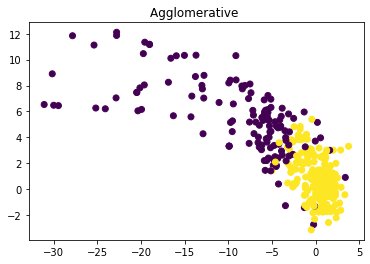

Ward linkage: 
  Training Accuracy:  0.6
Complete linkage: 
  Training Accuracy:  0.5474576271186441
Avg Linkage: 
  Training Accuracy:  0.5474576271186441
Single linkage: 
  Training Accuracy:  0.5016949152542373


In [89]:
gm = AgglomerativeClustering(n_clusters=2,linkage = 'ward').fit(X_train1)
train_predict1 = gm.labels_
train_acc1 = metrics.accuracy_score(train_label1,train_predict1)
#test_predict1 = gm.predict(X_test1)
#test_acc1 = metrics.accuracy_score(test_label1,test_predict1)
plt.scatter(X_test1['V3'], X_test1['V4'],c=test_predict1)
plt.title("Agglomerative ward ")
plt.show()
print("Ward linkage: ")
print("  Training Accuracy: ", train_acc1)
#print("  Test Accuracy: ", test_acc1)

gm = AgglomerativeClustering(n_clusters=2,linkage = 'complete').fit(X_train1)
train_predict1 = gm.labels_
train_acc1 = metrics.accuracy_score(train_label1,train_predict1)
#test_predict1 = gm.predict(X_test1)
#test_acc1 = metrics.accuracy_score(test_label1,test_predict1)
print("Complete linkage: ")
print("  Training Accuracy: ", train_acc1)
#print("  Test Accuracy: ", test_acc1)

gm = AgglomerativeClustering(n_clusters=2,linkage = 'average').fit(X_train1)
train_predict1 = gm.labels_
#train_acc1 = metrics.accuracy_score(train_label1,train_predict1)
#test_predict1 = gm.predict(X_test1)
#test_acc1 = metrics.accuracy_score(test_label1,test_predict1)
print("Avg Linkage: ")
print("  Training Accuracy: ", train_acc1)


gm = AgglomerativeClustering(n_clusters=2,linkage = 'single').fit(X_train1)
train_predict1 = gm.labels_
train_acc1 = metrics.accuracy_score(train_label1,train_predict1)

test_acc1 = metrics.accuracy_score(test_label1,test_predict1)
print("Single linkage: ")
print("  Training Accuracy: ", train_acc1)



In [70]:
gm = AgglomerativeClustering(n_clusters=2,linkage = 'ward').fit(X_train2)
train_predict2 = gm.labels_
train_acc2 = metrics.accuracy_score(train_label2,train_predict2)
#test_predict1 = gm.predict(X_test1)
#test_acc1 = metrics.accuracy_score(test_label1,test_predict1)
print("Ward linkage: ")
print("  Training Accuracy: ", train_acc1)
#print("  Test Accuracy: ", test_acc1)

gm = AgglomerativeClustering(n_clusters=2,linkage = 'complete').fit(X_train2)
train_predict2 = gm.labels_
train_acc2 = metrics.accuracy_score(train_label2,train_predict2)
#test_predict1 = gm.predict(X_test1)
#test_acc1 = metrics.accuracy_score(test_label1,test_predict1)
print("Complete linkage: ")
print("  Training Accuracy: ", train_acc1)
#print("  Test Accuracy: ", test_acc1)

gm = AgglomerativeClustering(n_clusters=2,linkage = 'average').fit(X_train2)
train_predict2 = gm.labels_
#train_acc1 = metrics.accuracy_score(train_label1,train_predict1)
#test_predict1 = gm.predict(X_test1)
#test_acc1 = metrics.accuracy_score(test_label1,test_predict1)
print("Avg Linkage: ")
print("  Training Accuracy: ", train_acc1)


gm = AgglomerativeClustering(n_clusters=2,linkage = 'single').fit(X_train2)
train_predict2 = gm.labels_
train_acc2 = metrics.accuracy_score(train_label2,train_predict2)

test_acc2 = metrics.accuracy_score(test_label2,test_predict2)
print("Single linkage: ")
print("  Training Accuracy: ", train_acc2)



Ward linkage: 
  Training Accuracy:  0.5016949152542373
Complete linkage: 
  Training Accuracy:  0.5016949152542373
Avg Linkage: 
  Training Accuracy:  0.5016949152542373
Single linkage: 
  Training Accuracy:  0.22091573133796544
